In [1]:
import pandas as pd
data=pd.read_csv('database.csv');

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


# WHICH BIRD SPECIES CAUSED THE MOST DAMAGE??

In [6]:
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re

In [8]:
species = data["Species Name"]
species_count=species.value_counts()
print(species_count)

UNKNOWN MEDIUM BIRD    38531
UNKNOWN SMALL BIRD     32981
MOURNING DOVE           7653
GULL                    6580
UNKNOWN BIRD            6400
                       ...  
MCKAY'S BUNTING            1
ANTILLEAN NIGHTHAWK        1
RAVENS                     1
NACUNDA NIGHTHAWK          1
CALIFORNIA TOWHEE          1
Name: Species Name, Length: 715, dtype: int64


In [9]:
species_count=species_count[species_count>4000]
print(species_count)

UNKNOWN MEDIUM BIRD    38531
UNKNOWN SMALL BIRD     32981
MOURNING DOVE           7653
GULL                    6580
UNKNOWN BIRD            6400
KILLDEER                4562
AMERICAN KESTREL        4476
BARN SWALLOW            4215
Name: Species Name, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

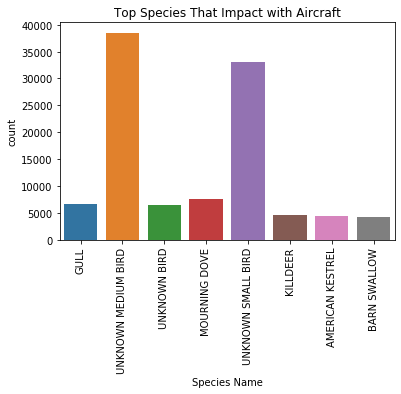

In [12]:
top_species = ["UNKNOWN MEDIUM BIRD","UNKNOWN SMALL BIRD","MOURNING DOVE", "GULL","UNKNOWN BIRD","KILLDEER", "AMERICAN KESTREL","BARN SWALLOW"]
top_species = species[species.isin(top_species)]
sns.countplot(top_species)
plt.title("Top Species That Impact with Aircraft")
plt.xticks(rotation='vertical')

### It is better to leave out all the Unknown Species Since we cannot gain any useful information out of them.

In [13]:
top_known_species = ["MOURNING DOVE", "GULL","KILLDEER", "AMERICAN KESTREL","BARN SWALLOW"]
top_known_species = species[species.isin(top_known_species)]
print(top_known_species.value_counts())

MOURNING DOVE       7653
GULL                6580
KILLDEER            4562
AMERICAN KESTREL    4476
BARN SWALLOW        4215
Name: Species Name, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

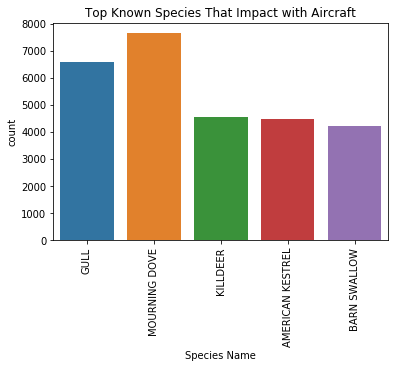

In [14]:
sns.countplot(top_known_species)
plt.title("Top Known Species That Impact with Aircraft")
plt.xticks(rotation='vertical')

### It is clear that "MOURNING DOVE" species of birds effect the aircrafts the most out of all known bird species.



# Which part of the airplane is most prone to damage in wildlife strikes?

In [17]:
attributes=(list(data))
damage_x=[]
strike_x=[]
dam=".*Damage$"
stri=".*Strike$"
for i in attributes:
    if (re.match(dam, i)):
        damage_x.append(i)
    elif (re.match(stri, i)):
        strike_x.append(i)

In [18]:
damage_x

['Aircraft Damage',
 'Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Damage',
 'Engine2 Damage',
 'Engine3 Damage',
 'Engine4 Damage',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Damage',
 'Tail Damage',
 'Lights Damage',
 'Other Damage']

### We are not interested with the column of Aircraft Damage



In [19]:
damage_x=damage_x[1:]
damage_x

['Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Damage',
 'Engine2 Damage',
 'Engine3 Damage',
 'Engine4 Damage',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Damage',
 'Tail Damage',
 'Lights Damage',
 'Other Damage']

In [20]:
strike_x

['Radome Strike',
 'Windshield Strike',
 'Nose Strike',
 'Engine1 Strike',
 'Engine2 Strike',
 'Engine3 Strike',
 'Engine4 Strike',
 'Propeller Strike',
 'Wing or Rotor Strike',
 'Fuselage Strike',
 'Landing Gear Strike',
 'Tail Strike',
 'Lights Strike',
 'Other Strike']

In [21]:
damage_y=[]
strike_y=[]
for i in strike_x:
    strike_y.append(data[i].sum())

for i in damage_x:
    damage_y.append(data[i].sum())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

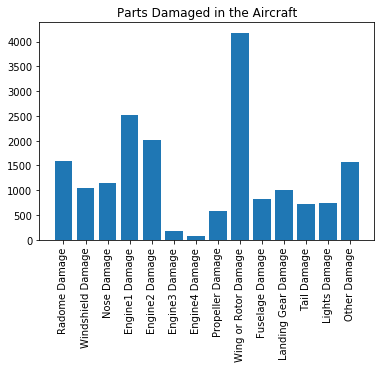

In [22]:
plt.bar(damage_x,damage_y)
plt.title("Parts Damaged in the Aircraft")
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

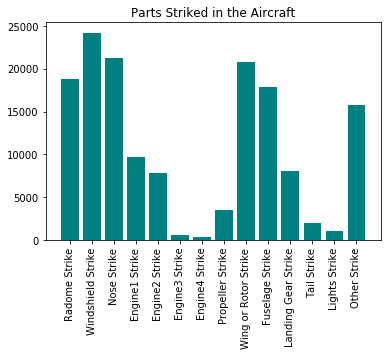

In [26]:
plt.bar(strike_x,strike_y,color='teal')
plt.title("Parts Striked in the Aircraft")
plt.xticks(rotation='vertical')

In [24]:
damage_per_strike=[]
parts=[]
for i in range(0,len(strike_x)):
    damage_per_strike.append(damage_y[i]/strike_y[i])
    parts.append(strike_x[i][:-7])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

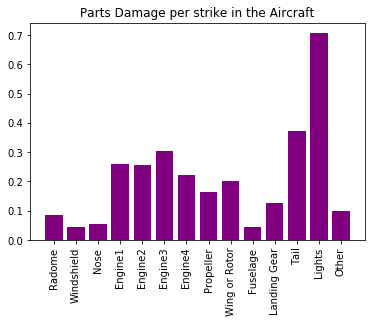

In [28]:
plt.bar(parts,damage_per_strike,color='purple')
plt.title("Parts Damage per strike in the Aircraft")
plt.xticks(rotation='vertical')

## CONCLUSION:
### From the Graphs above we can see that the part that reports most cases of damage in a wildlife strike is 'Wings or Rotor' Though most of the strikes are usually on the 'Windshield' But the most prone to damage are the 'Lights', they get damaged in approximately 70% of the strikes